In [4]:
from convokit import Corpus, download
corpus = Corpus(filename=download("diplomacy-corpus"))

No configuration file found at C:\Users\aadil/.convokit/config.yml; writing with contents: 
# Default Backend Parameters
db_host: localhost:27017
data_directory: ~/.convokit/saved-corpora
model_directory: ~/.convokit/saved-models
default_backend: mem
Done


In [5]:
corpus.print_summary_stats()

Number of Speakers: 83
Number of Utterances: 17289
Number of Conversations: 246


In [8]:
import pandas as pd

utterances = []
for utt in corpus.iter_utterances():
    utterances.append({
        "utterance_id": utt.id,
        "speaker": utt.speaker.id,
        "conversation_id": utt.conversation_id,
        "reply_to": utt.reply_to,
        "timestamp": utt.timestamp,
        "text": utt.text,
        "speaker_intention": utt.meta.get("speaker_intention"),
        "receiver_perception": utt.meta.get("receiver_perception"),
        "relative_message_index": utt.meta.get("relative_message_index"),
        "absolute_message_index": utt.meta.get("absolute_message_index"),
        "year": utt.meta.get("year"),
        "game_score": utt.meta.get("game_score"),
        "game_score_delta": utt.meta.get("game_score_delta"),
        "deception_quadrant": utt.meta.get("deception_quadrant")
    })

df = pd.DataFrame(utterances)
df.head(10)

utterance_id        speaker      conversation_id  \
0  Game1-italy-germany-0    italy-Game1  Game1-italy-germany   
1  Game1-italy-germany-1  germany-Game1  Game1-italy-germany   
2  Game1-italy-germany-2    italy-Game1  Game1-italy-germany   
3  Game1-italy-germany-3  germany-Game1  Game1-italy-germany   
4  Game1-italy-germany-4    italy-Game1  Game1-italy-germany   
5  Game1-italy-germany-5    italy-Game1  Game1-italy-germany   
6  Game1-italy-germany-6    italy-Game1  Game1-italy-germany   
7  Game1-italy-germany-7  germany-Game1  Game1-italy-germany   
8  Game1-italy-germany-8  germany-Game1  Game1-italy-germany   
9  Game1-italy-germany-9    italy-Game1  Game1-italy-germany   

                reply_to  timestamp  \
0                   None         74   
1  Game1-italy-germany-0         76   
2  Game1-italy-germany-1         86   
3  Game1-italy-germany-2         87   
4  Game1-italy-germany-3         89   
5  Game1-italy-germany-4         92   
6  Game1-italy-germany-5         97   
7  Game1-italy-germany-6        117   
8  Game1-italy-germany-7        119   
9  Game1-italy-germany-8        121   

                                                text speaker_intention  \
0  Germany!\n\nJust the person I want to speak wi...             Truth   
1  You've whet my appetite, Italy. What's the sug...             Truth   
2                                                  üëç             Truth   
3  It seems like there are a lot of ways that cou...             Truth   
4  Yeah, I can‚Äôt say I‚Äôve tried it and it works, ...             Truth   
5  I am just sensing that you don‚Äôt like this ide...             Truth   
6                                      Any thoughts?             Truth   
7  Sorry Italy I've been away doing, um, German t...             Truth   
8  I don't think I'm ready to go for that idea, h...             Truth   
9  I am pretty conflicted about whether to guess ...             Truth   

  receiver_perception  relative_message_index  absolute_message_index  year  \
0               Truth                       0                      74  1901   
1               Truth                       1                      76  1901   
2               Truth                       2                      86  1901   
3               Truth                       3                      87  1901   
4                None                       4                      89  1901   
5                None                       5                      92  1901   
6                None                       6                      97  1901   
7               Truth                       7                     117  1901   
8                 Lie                       8                     119  1901   
9               Truth                       9                     121  1901   

  game_score game_score_delta deception_quadrant  
0          3                0    Straightforward  
1          3                0    Straightforward  
2          3                0    Straightforward  
3          3                0    Straightforward  
4          3                0            Unknown  
5          3                0            Unknown  
6          3                0            Unknown  
7          3                0    Straightforward  
8          3                0          Cassandra  
9          3                0    Straightforward

In [9]:
print("Mesaj sayƒ±sƒ±:", len(df))
print(df["speaker_intention"].value_counts())
print(df["receiver_perception"].value_counts())


Mesaj sayƒ±sƒ±: 17289
speaker_intention
Truth    16402
Lie        887
Name: count, dtype: int64
receiver_perception
Truth    15005
Lie        778
Name: count, dtype: int64


Dataset already exists at C:\Users\aadil\.convokit\saved-corpora\diplomacy-corpus


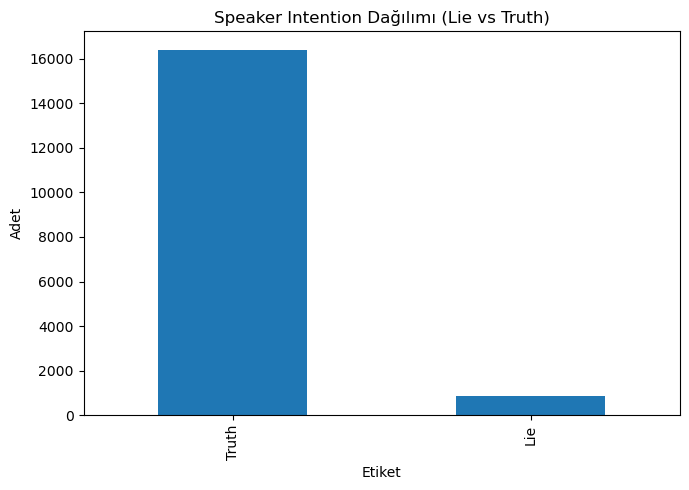

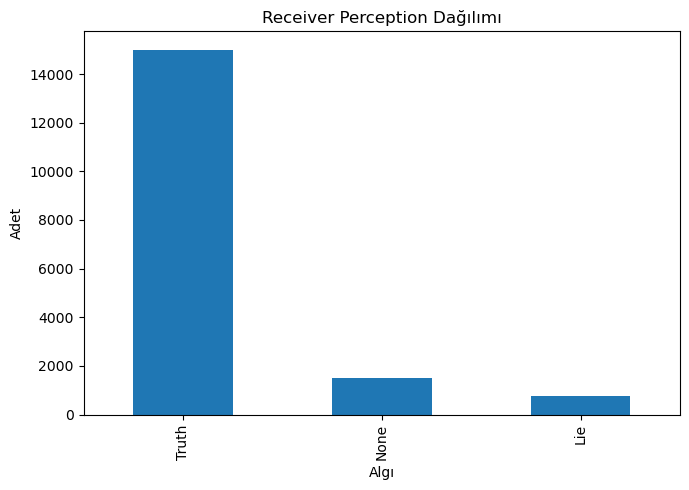

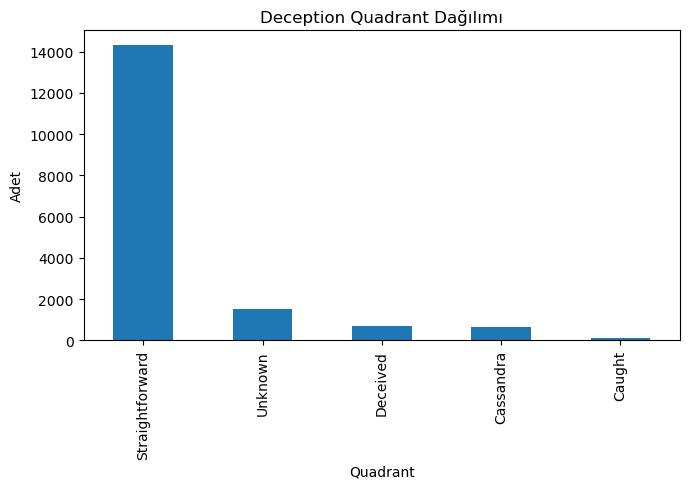

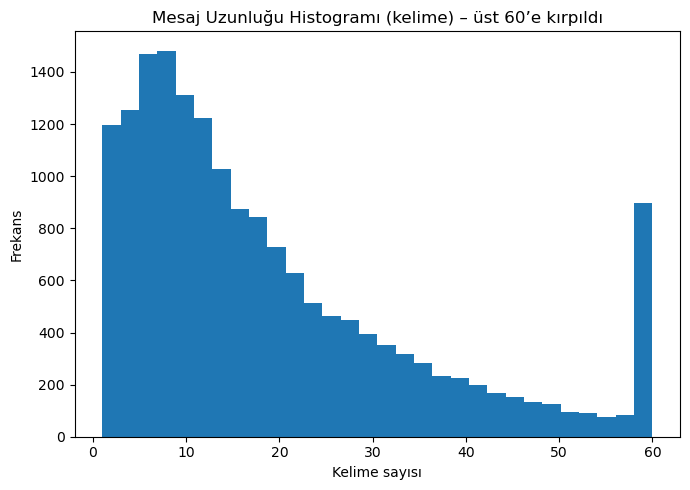

C:\Users\aadil\AppData\Local\Temp\ipykernel_5104\3825794392.py:101: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box, labels=["Truth","Lie"], showfliers=False)


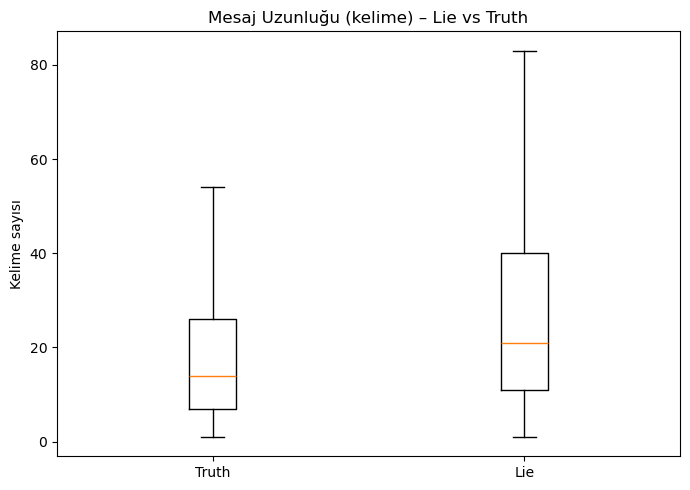

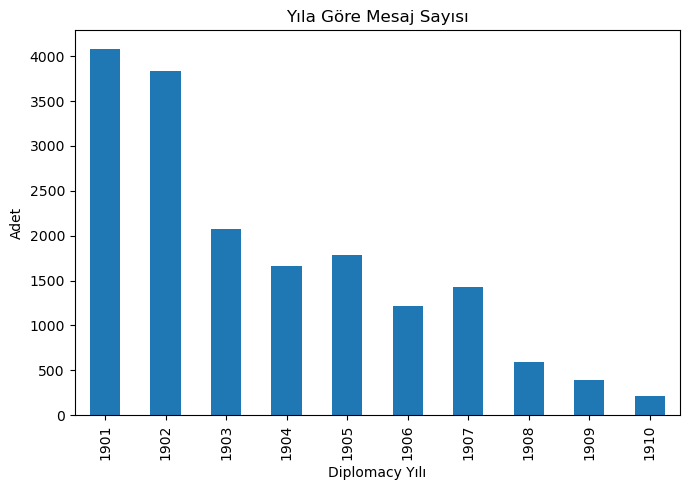

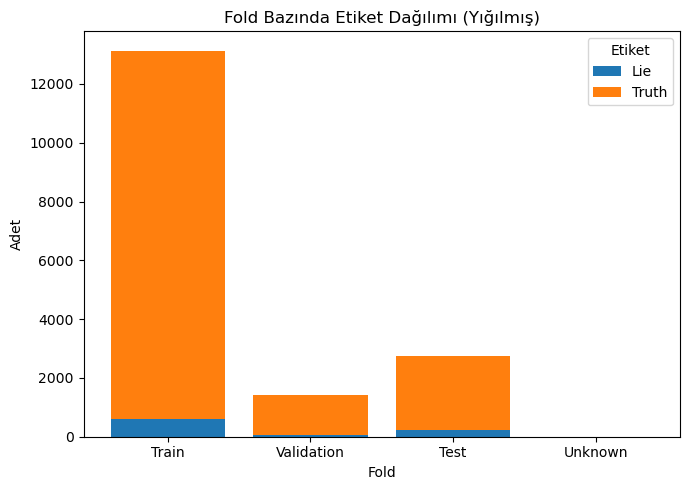

In [11]:
# 0) paketler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from convokit import Corpus, download

# 1) veriyi y√ºkle
corpus = Corpus(filename=download("diplomacy-corpus"))

# 2) utterance'larƒ± DataFrame'e d√∂k
rows = []
for utt in corpus.iter_utterances():
    rows.append({
        "utterance_id": utt.id,
        "speaker": getattr(utt.speaker, "id", None),
        "conversation_id": utt.conversation_id,
        "reply_to": utt.reply_to,
        "timestamp": utt.timestamp,
        "text": utt.text,
        "speaker_intention": utt.meta.get("speaker_intention"),
        "receiver_perception": utt.meta.get("receiver_perception"),
        "relative_message_index": utt.meta.get("relative_message_index"),
        "absolute_message_index": utt.meta.get("absolute_message_index"),
        "year": utt.meta.get("year"),
        "game_score": utt.meta.get("game_score"),
        "game_score_delta": utt.meta.get("game_score_delta"),
        "deception_quadrant": utt.meta.get("deception_quadrant"),
    })
df = pd.DataFrame(rows)

# 3) konu≈üma fold bilgisi (Train / Validation / Test) ekle
fold_rows = []
for convo in corpus.iter_conversations():
    fold_rows.append({"conversation_id": convo.id, "fold": convo.meta.get("acl2020_fold")})
fold_df = pd.DataFrame(fold_rows)
df = df.merge(fold_df, on="conversation_id", how="left")

# 4) yardƒ±mcƒ± √∂znitelikler
# - mesaj uzunluƒüu (kelime)
df["text"] = df["text"].fillna("")
df["text_len_words"] = df["text"].apply(lambda s: len(s.split()))
# - None temizliƒüi i√ßin yardƒ±mcƒ± kopyalar
df["speaker_intention_clean"] = df["speaker_intention"].fillna("Unknown")
df["receiver_perception_clean"] = df["receiver_perception"].fillna("None")
df["deception_quadrant_clean"] = df["deception_quadrant"].fillna("Unknown")
df["fold_clean"] = df["fold"].fillna("Unknown")

# 5) GRAFƒ∞KLER
plt.rcParams["figure.figsize"] = (7,5)  # her grafiƒüi ayrƒ± fig√ºrde tutacaƒüƒ±z

# 5.1 speaker_intention daƒüƒ±lƒ±mƒ± (Lie vs Truth)
counts_intent = df["speaker_intention_clean"].value_counts()
plt.figure()
counts_intent.plot(kind="bar")
plt.title("Speaker Intention Daƒüƒ±lƒ±mƒ± (Lie vs Truth)")
plt.xlabel("Etiket")
plt.ylabel("Adet")
plt.tight_layout()
plt.show()

# 5.2 receiver_perception daƒüƒ±lƒ±mƒ± (None dahil)
counts_perc = df["receiver_perception_clean"].value_counts()
plt.figure()
counts_perc.plot(kind="bar")
plt.title("Receiver Perception Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Algƒ±")
plt.ylabel("Adet")
plt.tight_layout()
plt.show()

# 5.3 deception_quadrant daƒüƒ±lƒ±mƒ±
counts_quad = df["deception_quadrant_clean"].value_counts()
plt.figure()
counts_quad.plot(kind="bar")
plt.title("Deception Quadrant Daƒüƒ±lƒ±mƒ±")
plt.xlabel("Quadrant")
plt.ylabel("Adet")
plt.tight_layout()
plt.show()

# 5.4 mesaj uzunluƒüu (kelime) histogramƒ±
# a≈üƒ±rƒ± uzun kuyruk etkisini azaltmak i√ßin √ºst sƒ±nƒ±r kƒ±rpmasƒ± (√∂r. 60 kelime)
cap = 60
plt.figure()
df["text_len_words"].clip(upper=cap).plot(kind="hist", bins=30)
plt.title(f"Mesaj Uzunluƒüu Histogramƒ± (kelime) ‚Äì √ºst {cap}‚Äôe kƒ±rpƒ±ldƒ±")
plt.xlabel("Kelime sayƒ±sƒ±")
plt.ylabel("Frekans")
plt.tight_layout()
plt.show()

# 5.5 mesaj uzunluƒüu boxplot (Lie vs Truth)
# sadece bilinen niyetler
df_known = df[df["speaker_intention"].isin(["Lie","Truth"])].copy()
plt.figure()
data_box = [
    df_known.loc[df_known["speaker_intention"]=="Truth", "text_len_words"].values,
    df_known.loc[df_known["speaker_intention"]=="Lie", "text_len_words"].values,
]
plt.boxplot(data_box, labels=["Truth","Lie"], showfliers=False)
plt.title("Mesaj Uzunluƒüu (kelime) ‚Äì Lie vs Truth")
plt.ylabel("Kelime sayƒ±sƒ±")
plt.tight_layout()
plt.show()

# 5.6 yƒ±la g√∂re mesaj sayƒ±sƒ± (oyun yƒ±lƒ±)
# yƒ±l bilgisi olmayanlarƒ± √ßƒ±kar
year_counts = df.dropna(subset=["year"])["year"].astype(int).value_counts().sort_index()
plt.figure()
year_counts.plot(kind="bar")
plt.title("Yƒ±la G√∂re Mesaj Sayƒ±sƒ±")
plt.xlabel("Diplomacy Yƒ±lƒ±")
plt.ylabel("Adet")
plt.tight_layout()
plt.show()

# 5.7 fold (Train/Val/Test) bazƒ±nda etiket daƒüƒ±lƒ±mƒ± ‚Äì yƒ±ƒüƒ±lmƒ±≈ü √ßubuk grafik
pivot_fold = (
    df[df["speaker_intention"].isin(["Lie","Truth"])]
    .groupby(["fold_clean","speaker_intention"]).size()
    .unstack(fill_value=0)
    .reindex(index=["Train","Validation","Test","Unknown"], fill_value=0)
)
plt.figure()
bottom = np.zeros(len(pivot_fold))
for col in pivot_fold.columns:
    plt.bar(pivot_fold.index, pivot_fold[col].values, bottom=bottom, label=col)
    bottom += pivot_fold[col].values
plt.title("Fold Bazƒ±nda Etiket Daƒüƒ±lƒ±mƒ± (Yƒ±ƒüƒ±lmƒ±≈ü)")
plt.xlabel("Fold")
plt.ylabel("Adet")
plt.legend(title="Etiket")
plt.tight_layout()
plt.show()

# (ƒ∞steƒüe baƒülƒ±) fig√ºrleri diske kaydetmek i√ßin:
# plt.savefig("figure_name.png", dpi=200, bbox_inches="tight")
